## Machine Learning: Iris Classification

*Submitted by:*  
**Christian Elijah Darvin**  
BCS32  
College of Information and Computer Studies - De La Salle University Dasmariñas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(
    "./data/iris.data",
    names=[
        "sepal length (cm)",
        "sepal width (cm)",
        "petal length (cm)",
        "petal width (cm)",
        "target",
    ],
)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Explanatory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [5]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

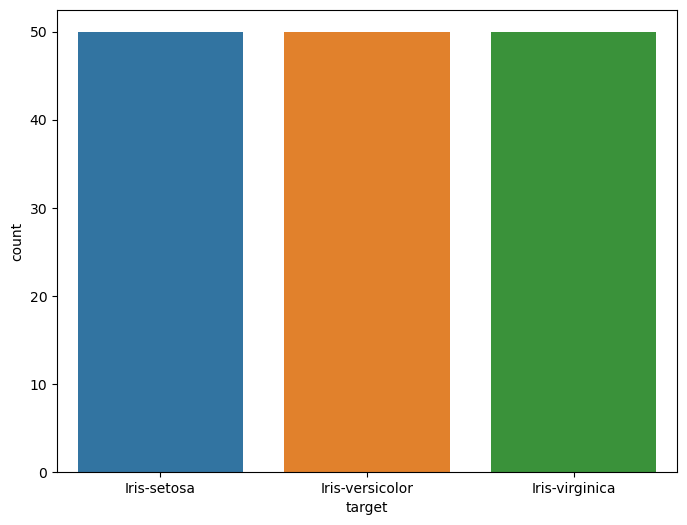

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="target", hue="target")
plt.show()

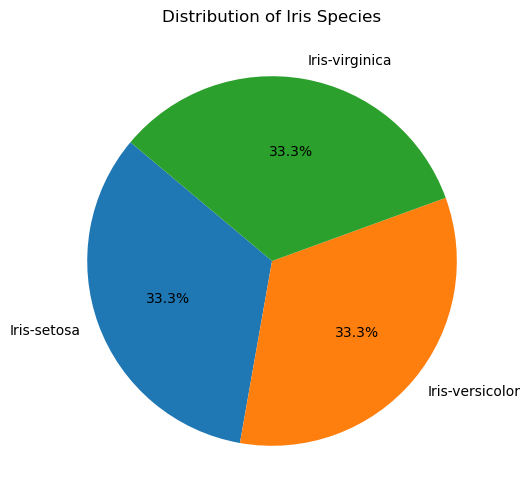

In [7]:
labels = df["target"].unique()
target_counts = df["target"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Iris Species")
plt.show()

<Figure size 800x600 with 0 Axes>

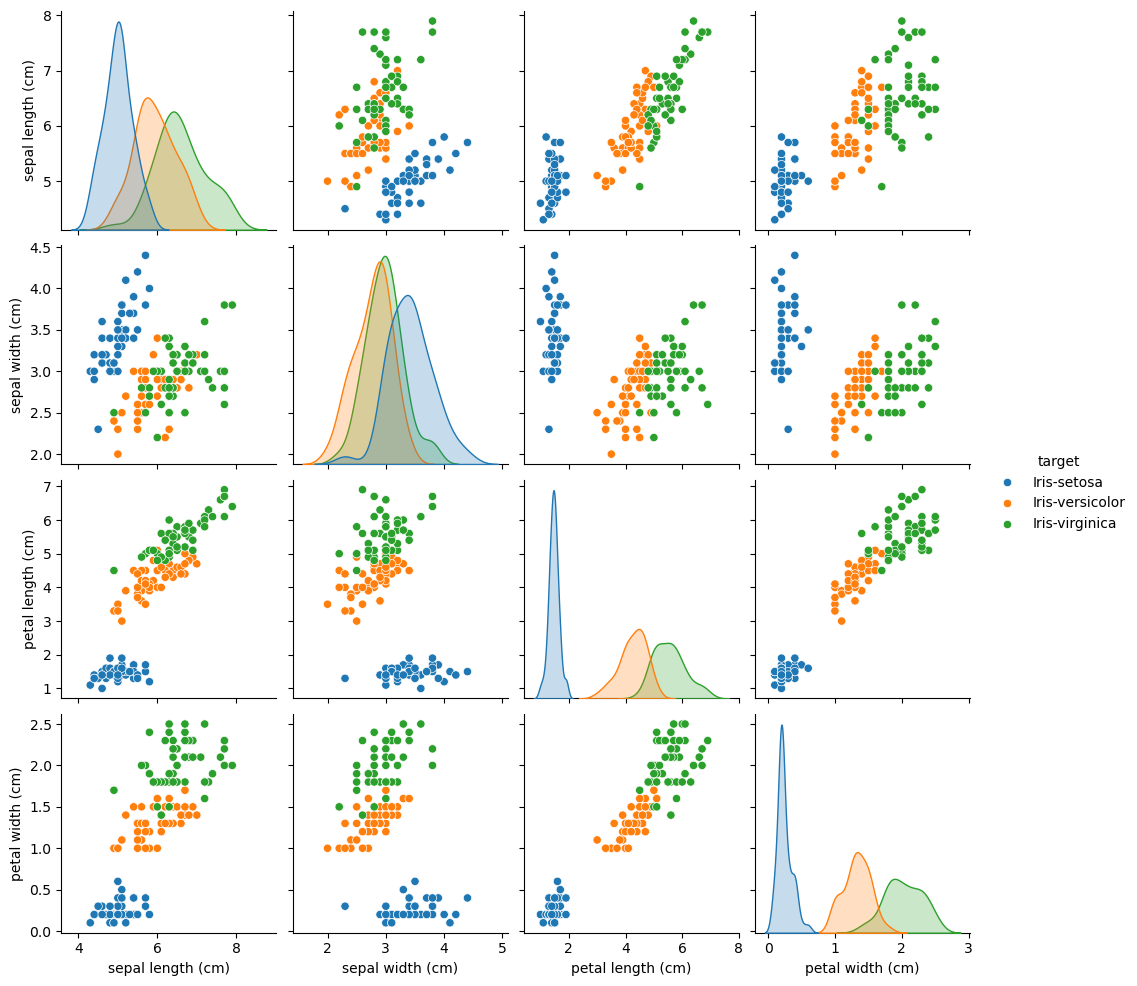

In [8]:
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue="target")
plt.show()

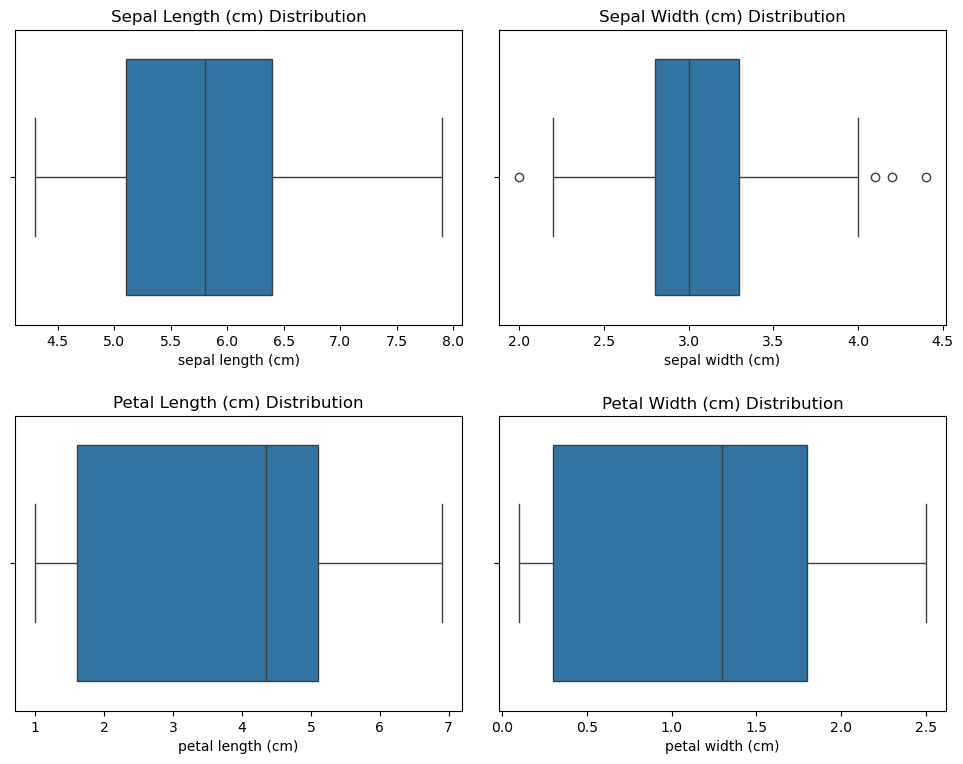

In [9]:
def create_boxplot(data, x, title, ax):
    sns.boxplot(data=data, x=x, ax=ax, legend=False)
    ax.set_title(title)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

create_boxplot(df, "sepal length (cm)", "Sepal Length (cm) Distribution", axes[0, 0])
create_boxplot(df, "sepal width (cm)", "Sepal Width (cm) Distribution", axes[0, 1])
create_boxplot(df, "petal length (cm)", "Petal Length (cm) Distribution", axes[1, 0])
create_boxplot(df, "petal width (cm)", "Petal Width (cm) Distribution", axes[1, 1])

plt.tight_layout(pad=2)
plt.show()

In [10]:
def get_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (df < lower_bound) | (df > upper_bound)
    outlier_indices = df[outliers_mask.any(axis=1)].index
    return outlier_indices


outlier_indices = get_outliers_iqr(
    df[
        [
            "sepal length (cm)",
            "sepal width (cm)",
            "petal length (cm)",
            "petal width (cm)",
        ]
    ]
)
print(outlier_indices)

Index([15, 32, 33, 60], dtype='int64')


In [11]:
df = df.drop([15, 32, 33, 60])
df.shape

(146, 5)

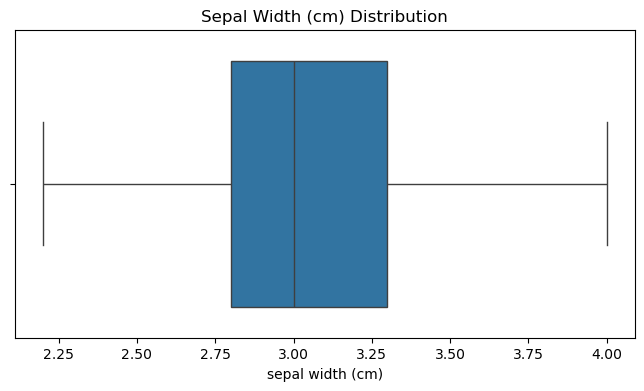

In [12]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="sepal width (cm)")
plt.title("Sepal Width (cm) Distribution")
plt.show()

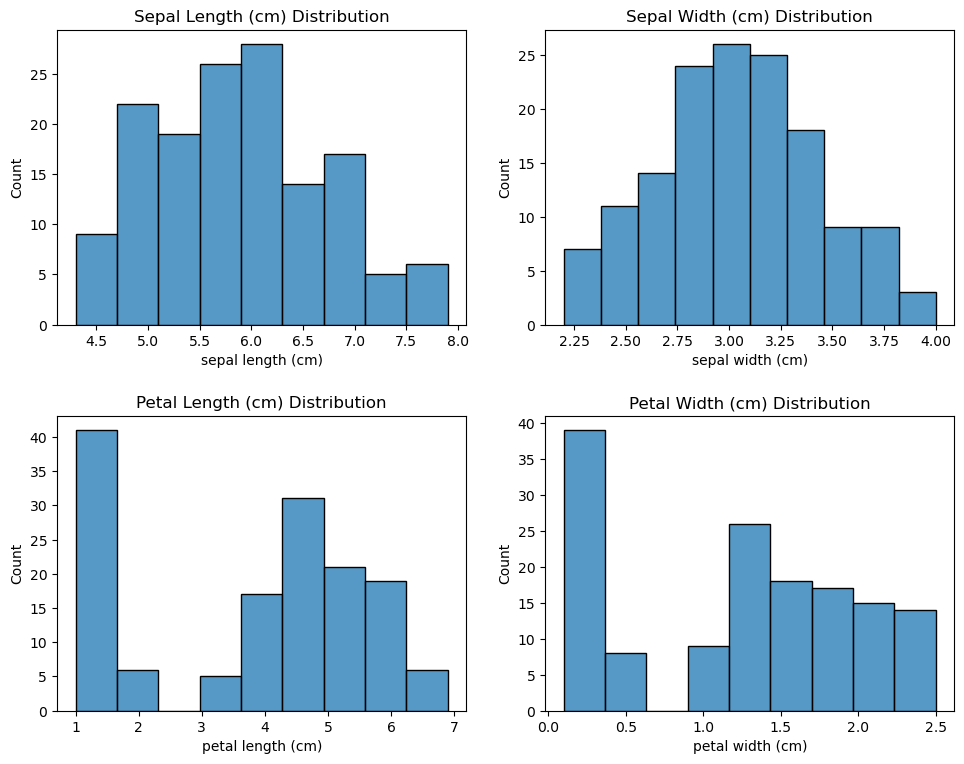

In [14]:
def create_histplot(data, x, title, ax):
    sns.histplot(data=data, x=x, ax=ax)
    ax.set_title(title)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

create_histplot(df, "sepal length (cm)", "Sepal Length (cm) Distribution", axes[0, 0])
create_histplot(df, "sepal width (cm)", "Sepal Width (cm) Distribution", axes[0, 1])
create_histplot(df, "petal length (cm)", "Petal Length (cm) Distribution", axes[1, 0])
create_histplot(df, "petal width (cm)", "Petal Width (cm) Distribution", axes[1, 1])

plt.tight_layout(pad=2)
plt.show()

In [15]:
X = df.drop(["target"], axis=1)
y = df["target"]

display(X.head())
display(y.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: target, dtype: object

In [16]:
X = np.array(X)
y = np.array(y)

### Model Splitting

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Model Training

In [18]:
from sklearn.neighbors import KNeighborsClassifier

X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean", p=1)
knn.fit(X_train, y_train_encoded)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=1)

In [19]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_pred=y_pred, y_true=y_test_encoded)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9318181818181818


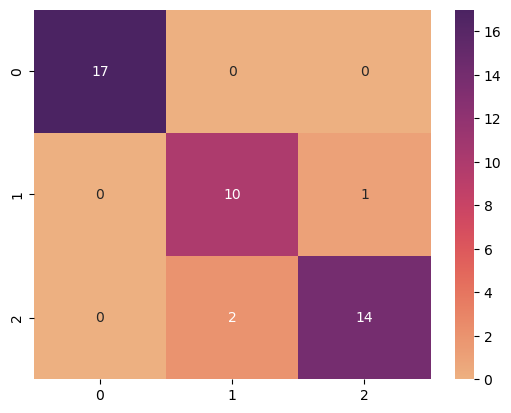

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_encoded, y_pred=y_pred)
sns.heatmap(cm, annot=True, cmap="flare", fmt="d")
plt.show()

In [21]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import FactorAnalysis


def plot_decision_boundary(X, y, title, n_neighbors, ax):
    plt.sca(ax)
    X_set, y_set = X, y

    pca = FactorAnalysis(n_components=2)
    X_set_pca = pca.fit_transform(X_set)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", p=1)

    knn.fit(X_set_pca, y_set)

    x1_min, x1_max = X_set_pca[:, 0].min() - 1, X_set_pca[:, 0].max() + 1
    x2_min, x2_max = X_set_pca[:, 1].min() - 1, X_set_pca[:, 1].max() + 1
    XX, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

    Z = knn.predict(np.c_[XX.ravel(), yy.ravel()])
    Z = Z.reshape(XX.shape)

    ax.contourf(
        XX, yy, Z, alpha=0.5, cmap=ListedColormap(["#1f77b4", "#2ca02c", "#d62728"])
    )
    ax.set_xlim(XX.min(), XX.max())
    ax.set_ylim(yy.min(), yy.max())

    for i, j in enumerate(np.unique(y_set)):
        ax.scatter(
            X_set_pca[y_set == j, 0],
            X_set_pca[y_set == j, 1],
            color=ListedColormap(["#1f77b4", "#2ca02c", "#d62728"])(i),
            label=j,
        )

    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.legend()

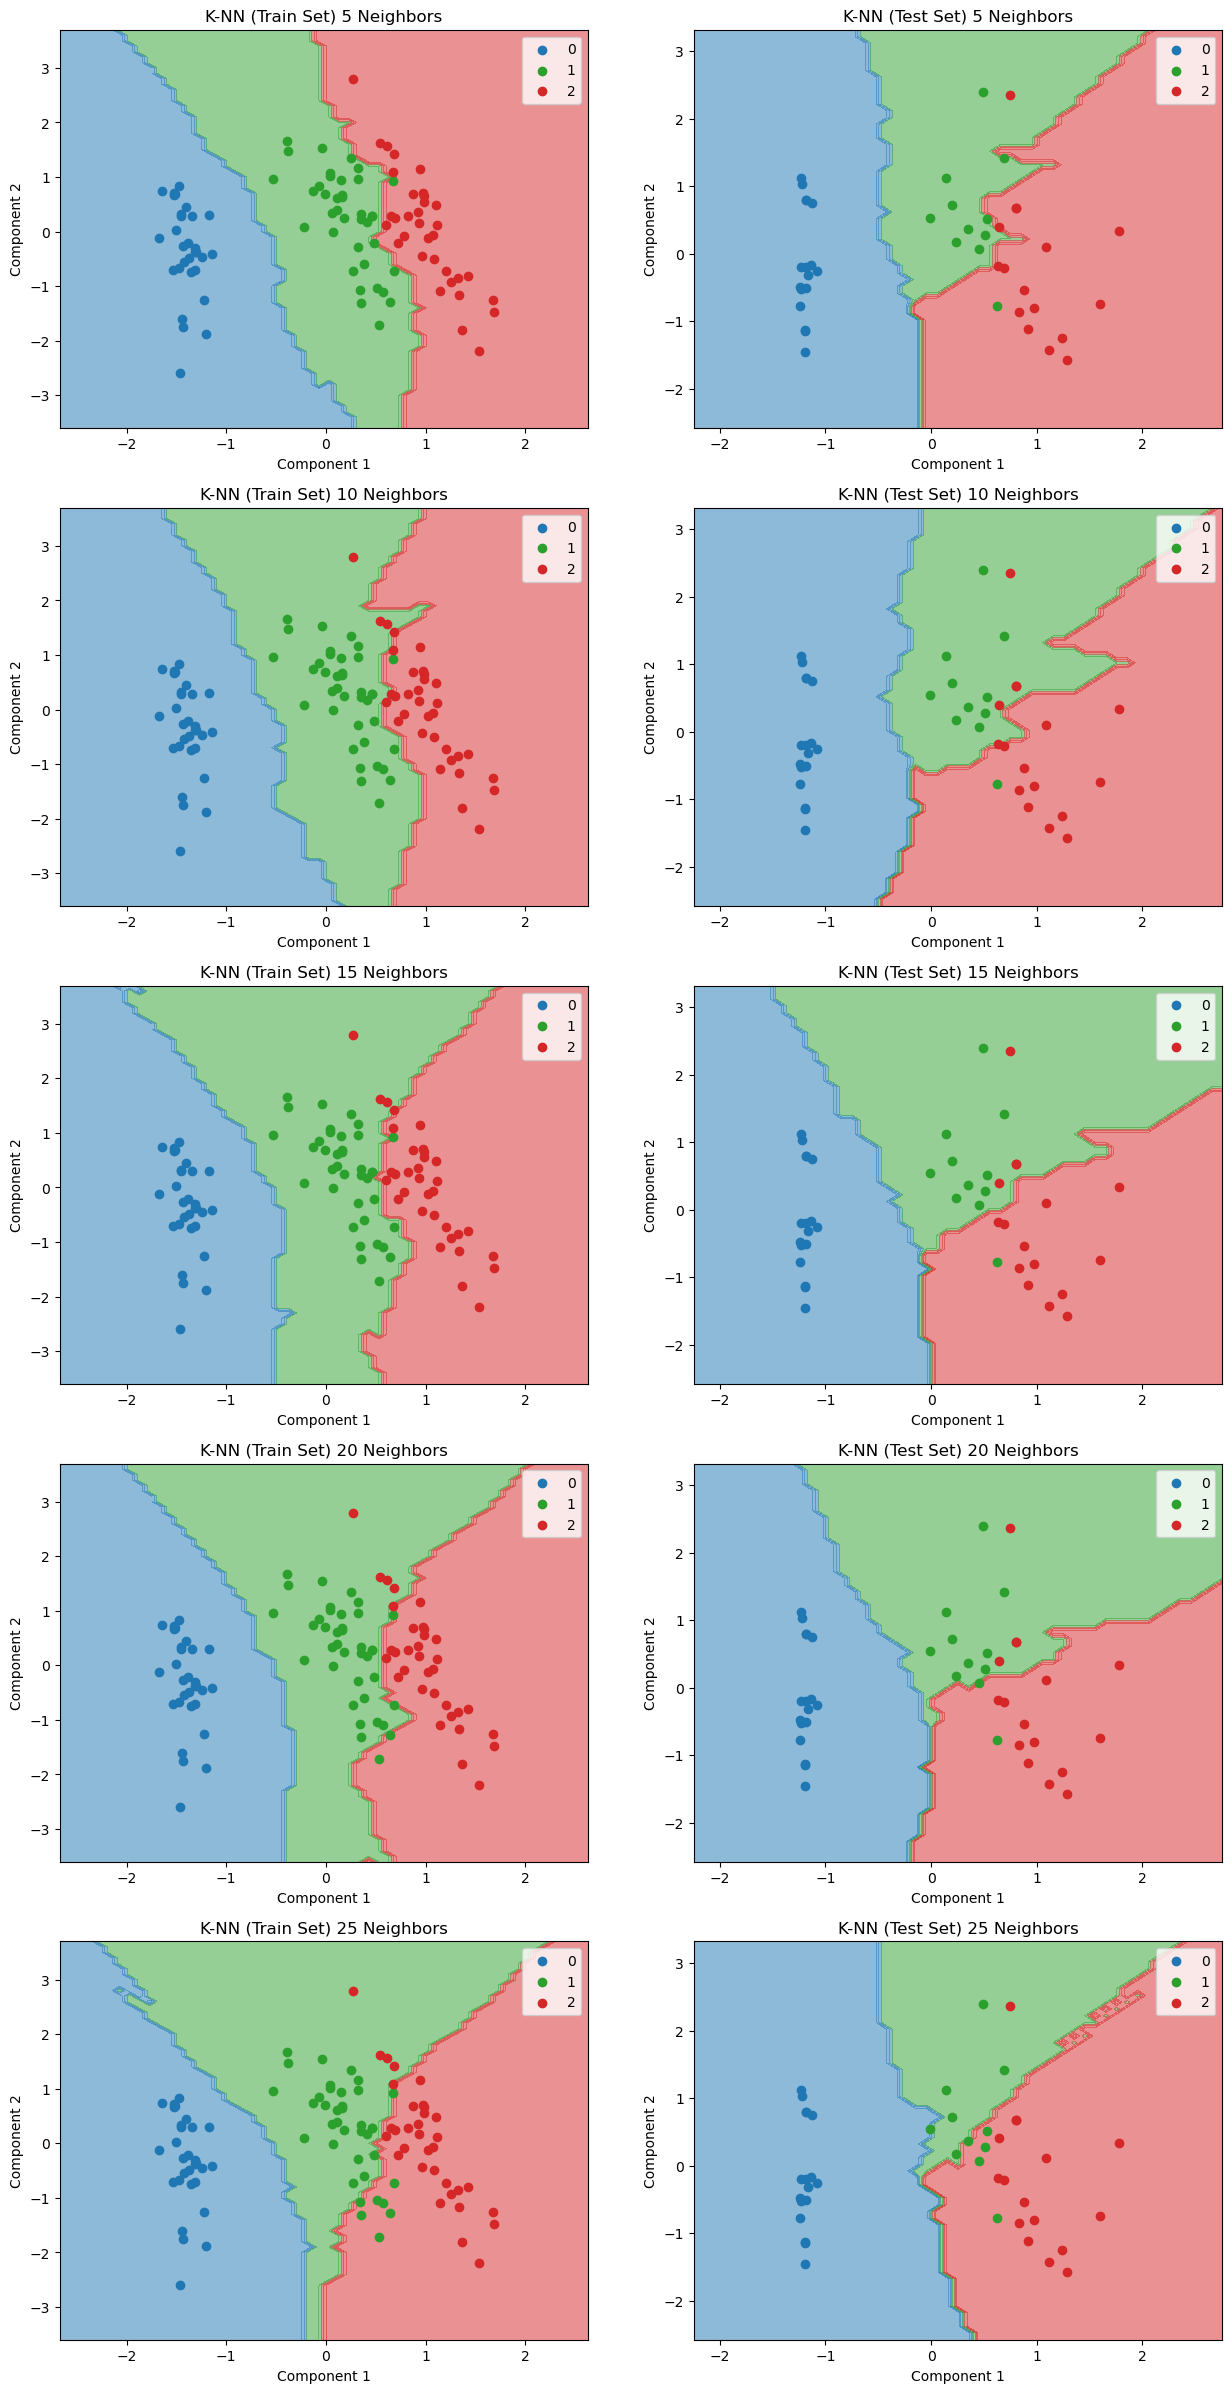

In [22]:
n_neighbors_list = [5, 10, 15, 20, 25]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))


for i, n_neighbors in enumerate(n_neighbors_list):
    plot_decision_boundary(
        X_train,
        y_train_encoded,
        f"K-NN (Train Set) {n_neighbors} Neighbors",
        n_neighbors,
        axes[i, 0],
    )
    plot_decision_boundary(
        X_test,
        y_test_encoded,
        f"K-NN (Test Set) {n_neighbors} Neighbors",
        n_neighbors,
        axes[i, 1],
    )

plt.show()

Metrics for n_neighbors=5:
  Accuracy: 0.9318
  Precision: 0.9341
  Recall: 0.9318
  F1 Score: 0.9322



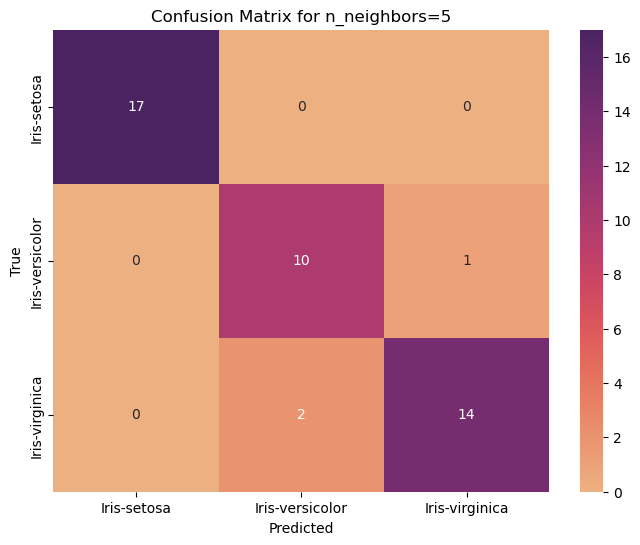

Metrics for n_neighbors=10:
  Accuracy: 0.9318
  Precision: 0.9341
  Recall: 0.9318
  F1 Score: 0.9322



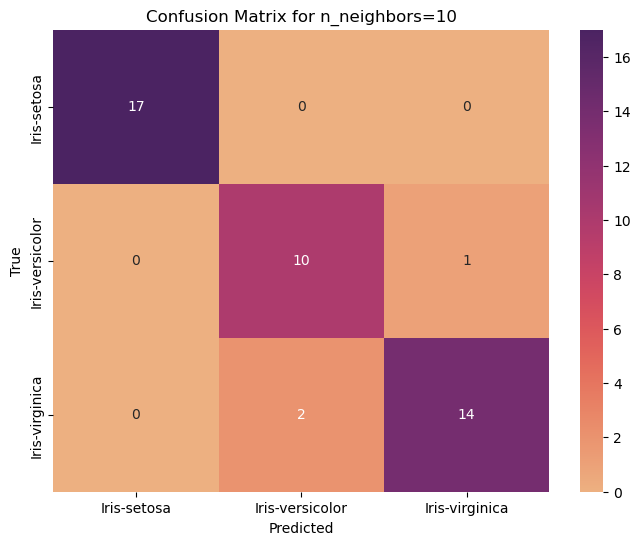

Metrics for n_neighbors=15:
  Accuracy: 0.9773
  Precision: 0.9792
  Recall: 0.9773
  F1 Score: 0.9774



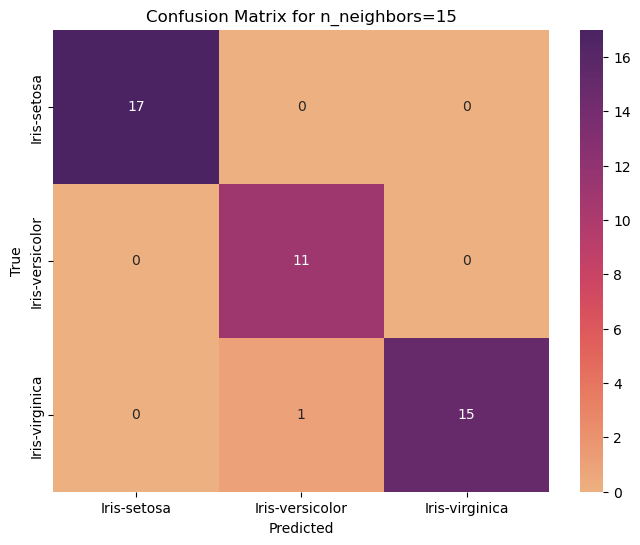

Metrics for n_neighbors=20:
  Accuracy: 0.9318
  Precision: 0.9464
  Recall: 0.9318
  F1 Score: 0.9324



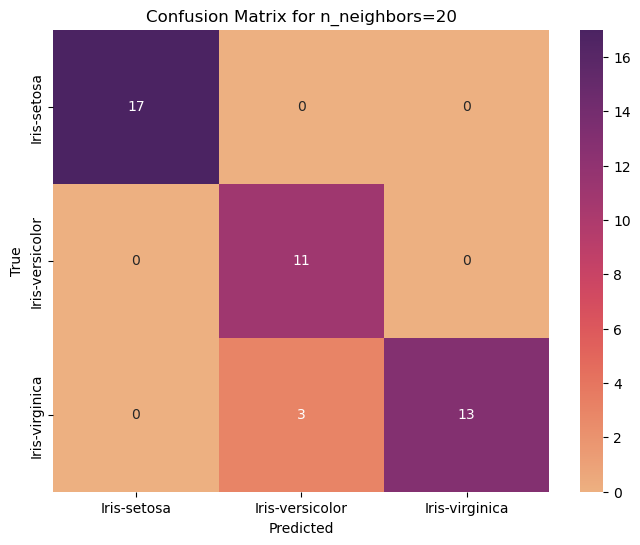

Metrics for n_neighbors=25:
  Accuracy: 0.9318
  Precision: 0.9464
  Recall: 0.9318
  F1 Score: 0.9324



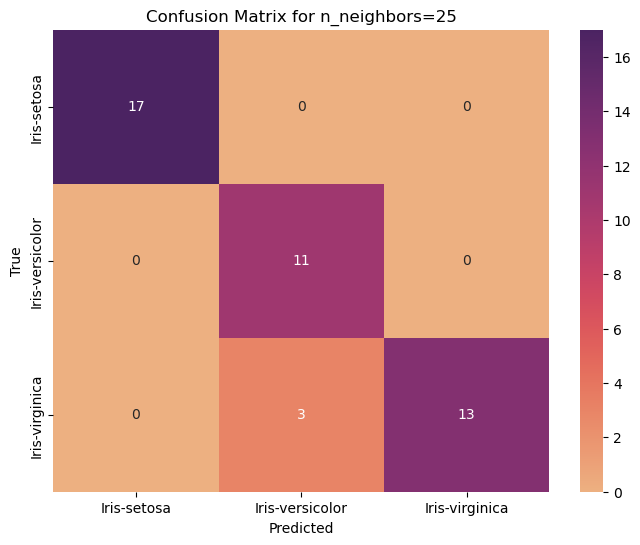

In [23]:
from sklearn.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)


for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", p=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    class_report = classification_report(y_test, y_pred)

    print(f"Metrics for n_neighbors={n_neighbors}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}\n")

    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="flare",
        xticklabels=df["target"].unique(),
        yticklabels=df["target"].unique(),
    )
    plt.title(f"Confusion Matrix for n_neighbors={n_neighbors}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()